In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv('loan.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:

for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    df[col].fillna(df[col].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

C:\Users\jaydi\AppData\Local\Temp\ipykernel_2716\4012913982.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\jaydi\AppData\Local\Temp\ipykernel_2716\4012913982.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [6]:
df = pd.get_dummies(df, drop_first=True)

In [7]:
x_mean = df["ApplicantIncome"].mean()
y_mean = df["LoanAmount"].mean()
print("\nMean of ApplicantIncome:", x_mean)
print("Mean of LoanAmount:", y_mean)


Mean of ApplicantIncome: 5403.459283387622
Mean of LoanAmount: 145.4657980456026


In [8]:
numerator = ((df["ApplicantIncome"] - x_mean) * (df["LoanAmount"] - y_mean)).sum()
denominator = ((df["ApplicantIncome"] - x_mean) ** 2).sum()
B1 = numerator / denominator
print("\nCalculated Slope (B1):", B1)


Calculated Slope (B1): 0.007781390371466648


In [9]:
B0 = y_mean - (B1 * x_mean)
print("Calculated Intercept (B0):", B0)

Calculated Intercept (B0): 103.4193720052381


In [10]:
df["Predicted_LoanAmount"] = B0 + B1 * df["ApplicantIncome"]

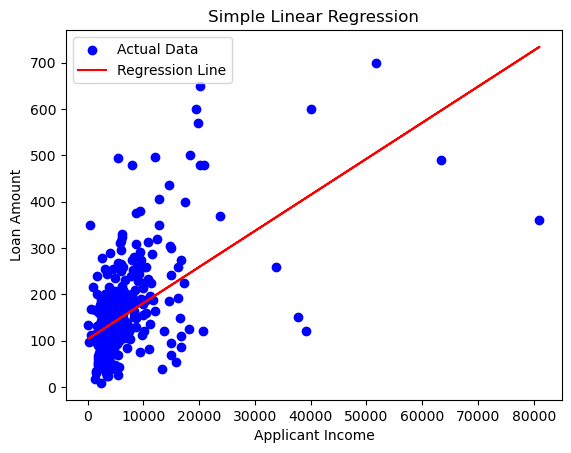

In [11]:
plt.scatter(df["ApplicantIncome"], df["LoanAmount"], color='blue', label="Actual Data")
plt.plot(df["ApplicantIncome"], df["Predicted_LoanAmount"], color='red', label="Regression Line")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

In [12]:
rmse = np.sqrt(((df["LoanAmount"] - df["Predicted_LoanAmount"]) ** 2).mean())
print("\nRoot Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 69.41774402242615
